# State 패턴

## S.1 소개

* State 패턴은 Behavioral Design Pattern이다.
* 상태를 저장하고, 변경될 때마다 갱신해서 상태에 맞는 함수가 호출되도록 한다. "...allows an object to alter its behavior when its inernal state changes..."
* 동작이 필요한 기계는 Finite State Machine으로 설명할 수 있다.

구분 | 설명
-----|-----
state | 시점에 따라 특정 상태에 있어야 한다. 처음에 가지게 되는 초기 state 또는 상황에 따라 여러 state 가운데 한 state를 가질 수 있다.
transition | 외부 입력에 따라 가능한 state로 전환할 수 있다.

* 예를 들어
    * 게임캐릭터 - 걷는 경우, 뛰는 경우...
    * 가전제품 - on, off, sleep...
    * 지하철 개찰구 - 열림, 잠금...

* strategy pattern과 비교

구분 | 설명
-----|-----
state | state에 따라 context를 변경하여, 해당하는 기능을 수행할 수 있다.
strategy | context가 고정되어 변경할 수 없다.

* 디자인패턴 요소

요소 | 설명
---|---
name | state
problem | state가 다수 있고, if문으로 state 통제.
solution | state를 한 곳에서 관리
consequence | 변경 최소화

* 프로그래밍 과제
    * case extension
        * 동전을 잘 못 넣은 경우, 고장상태 구현
    * new case
        * 동영상 player
            * 화면이 꺼져 있으면 재생중지
            * 재생이 끝나면 화면 sleep
            * 재생할 때는 화면sleep하지 않고

## S.2 문제

* 복잡한 상태의 변화가 있고, if문으로 그 변화를 관리하는 경우. 수정이 어렵다.
* 함수마다 상태를 관리하게 된다. 그 결과, 함수 (4개) x 상태 (4개) 정도의 if문이 최소한 필요하다.

In [1]:
import iplantuml

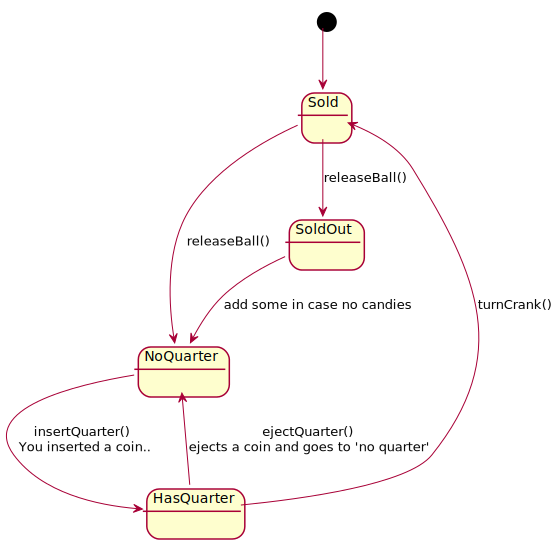

In [2]:
%%plantuml
@startuml
[*] --> Sold
NoQuarter --> HasQuarter:insertQuarter()\n You inserted a coin..
SoldOut --> NoQuarter: add some in case no candies
HasQuarter --> Sold:turnCrank()
HasQuarter --> NoQuarter:ejectQuarter()\nejects a coin and goes to 'no quarter'
Sold --> NoQuarter:releaseBall()
Sold --> SoldOut:releaseBall()
@enduml

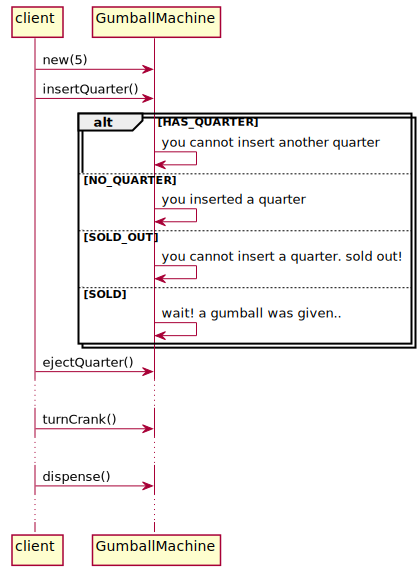

In [3]:
%%plantuml
@startuml
client -> GumballMachine:new(5)
client -> GumballMachine:insertQuarter()
alt HAS_QUARTER
GumballMachine -> GumballMachine:you cannot insert another quarter
else NO_QUARTER
GumballMachine -> GumballMachine:you inserted a quarter
else SOLD_OUT
GumballMachine -> GumballMachine:you cannot insert a quarter. sold out!
else SOLD
GumballMachine -> GumballMachine:wait! a gumball was given..
end
client -> GumballMachine:ejectQuarter()
...
client -> GumballMachine:turnCrank()
...
client -> GumballMachine:dispense()
...
@enduml

In [ ]:
# %load ./src/headfirst/state/gumball/GumballMachine.java
package headfirst.state.gumball;

public class GumballMachine {
    final static int SOLD_OUT = 0;
    final static int NO_QUARTER = 1;
    final static int HAS_QUARTER = 2;
    final static int SOLD = 3;

    int state = SOLD_OUT;
    int count = 0;

    public GumballMachine(int count) {
        this.count = count;
    	if (count > 0) {
            state = NO_QUARTER;
    	}
    }
    public void insertQuarter() {
    	if (state == HAS_QUARTER) {
            System.out.println("You can't insert another quarter");
    	} else if (state == NO_QUARTER) {
            state = HAS_QUARTER;
            System.out.println("You inserted a quarter");
    	} else if (state == SOLD_OUT) {
            System.out.println("You can't insert a quarter, the machine is sold out");
    	} else if (state == SOLD) {
            System.out.println("Please wait, we're already giving you a gumball");
    	}
    }
    public void ejectQuarter() {
    	if (state == HAS_QUARTER) {
            System.out.println("Quarter returned");
            state = NO_QUARTER;
    	} else if (state == NO_QUARTER) {
            System.out.println("You haven't inserted a quarter");
    	} else if (state == SOLD) {
            System.out.println("Sorry, you already turned the crank");
    	} else if (state == SOLD_OUT) {
            System.out.println("You can't eject, you haven't inserted a quarter yet");
    	}
    }
    public void turnCrank() {
    	if (state == SOLD) {
            System.out.println("Turning twice doesn't get you another gumball!");
    	} else if (state == NO_QUARTER) {
            System.out.println("You turned but there's no quarter");
    	} else if (state == SOLD_OUT) {
            System.out.println("You turned, but there are no gumballs");
    	} else if (state == HAS_QUARTER) {
            System.out.println("You turned...");
            state = SOLD;
            dispense();
    	}
    }
    public void dispense() {
    	if (state == SOLD) {
            System.out.println("A gumball comes rolling out the slot");
            count = count - 1;
            if (count == 0) {
                System.out.println("Oops, out of gumballs!");
                state = SOLD_OUT;
            } else {
                state = NO_QUARTER;
            }
    	} else if (state == NO_QUARTER) {
            System.out.println("You need to pay first");
    	} else if (state == SOLD_OUT) {
            System.out.println("No gumball dispensed");
    	} else if (state == HAS_QUARTER) {
            System.out.println("No gumball dispensed");
    	}
    }
    public void refill(int numGumBalls) {
    	this.count = numGumBalls;
    	state = NO_QUARTER;
    }
    public String toString() {
    	StringBuffer result = new StringBuffer();
    	result.append("\nMighty Gumball, Inc.");
    	result.append("\nJava-enabled Standing Gumball Model #2004\n");
    	result.append("Inventory: " + count + " gumball");
    	if (count != 1) {
            result.append("s");
    	}
    	result.append("\nMachine is ");
    	if (state == SOLD_OUT) {
            result.append("sold out");
    	} else if (state == NO_QUARTER) {
            result.append("waiting for quarter");
    	} else if (state == HAS_QUARTER) {
            result.append("waiting for turn of crank");
    	} else if (state == SOLD) {
            result.append("delivering a gumball");
    	}
    	result.append("\n");
    	return result.toString();
    }
}


In [ ]:
# %load ./src/headfirst/state/gumball/GumballMachineTestDrive.java
package headfirst.state.gumball;

public class GumballMachineTestDrive {
    public static void main(String[] args) {
    	GumballMachine gumballMachine = new GumballMachine(5);

    	System.out.println(gumballMachine);

    	gumballMachine.insertQuarter();
    	gumballMachine.turnCrank();

    	System.out.println(gumballMachine);

    	gumballMachine.insertQuarter();
    	gumballMachine.ejectQuarter();
    	gumballMachine.turnCrank();

    	System.out.println(gumballMachine);

    	gumballMachine.insertQuarter();
    	gumballMachine.turnCrank();
    	gumballMachine.insertQuarter();
    	gumballMachine.turnCrank();
    	gumballMachine.ejectQuarter();

    	System.out.println(gumballMachine);

    	gumballMachine.insertQuarter();
    	gumballMachine.insertQuarter();
    	gumballMachine.turnCrank();
    	gumballMachine.insertQuarter();
    	gumballMachine.turnCrank();
    	gumballMachine.insertQuarter();
    	gumballMachine.turnCrank();

    	System.out.println(gumballMachine);
    }
}

In [13]:
!javac -d classes/ -sourcepath src/ src/headfirst/state/gumball/*.java
!java -cp classes/ headfirst.state.gumball.GumballMachineTestDrive


Mighty Gumball, Inc.
Java-enabled Standing Gumball Model #2004
Inventory: 5 gumballs
Machine is waiting for quarter

You inserted a quarter
You turned...
A gumball comes rolling out the slot

Mighty Gumball, Inc.
Java-enabled Standing Gumball Model #2004
Inventory: 4 gumballs
Machine is waiting for quarter

You inserted a quarter
Quarter returned
You turned but there's no quarter

Mighty Gumball, Inc.
Java-enabled Standing Gumball Model #2004
Inventory: 4 gumballs
Machine is waiting for quarter

You inserted a quarter
You turned...
A gumball comes rolling out the slot
You inserted a quarter
You turned...
A gumball comes rolling out the slot
You haven't inserted a quarter

Mighty Gumball, Inc.
Java-enabled Standing Gumball Model #2004
Inventory: 2 gumballs
Machine is waiting for quarter

You inserted a quarter
You can't insert another quarter
You turned...
A gumball comes rolling out the slot
You inserted a quarter
You turned...
A gumball comes rolling out the slot
Oops, out of gumball

## S.3 설계

* 변경요구가 있을 때마다 수정이 쉽도록 state를 인터페이스로 구현
* gumball machine의 모든 상태를 state로 구현
* if문이 없어지고, polymorphic method call

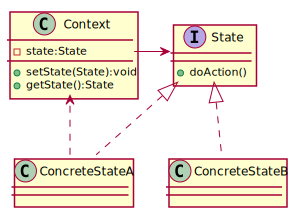

In [32]:
%%plantuml
@startuml
interface State {
    +doAction()
}
class Context {
    -state:State
    +setState(State):void
    +getState():State
}
State <|.. ConcreteStateA
State <|.. ConcreteStateB
Context -right-> State
ConcreteStateA ..> Context
@enduml

## S.4 Case Implementation


* Gumball
* Gumball Winner


### S.4.1 Gumball

* gumballstate package


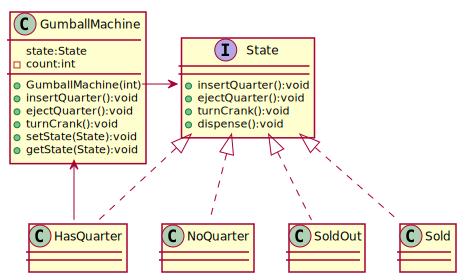

In [38]:
%%plantuml
@startuml
class GumballMachine {
    state:State
    -count:int
    +GumballMachine(int)
    +insertQuarter():void
    +ejectQuarter():void
    +turnCrank():void
    +setState(State):void
    +getState(State):void
}
interface State {
    +insertQuarter():void
    +ejectQuarter():void
    +turnCrank():void
    +dispense():void
}
State <|.. HasQuarter
State <|.. NoQuarter
State <|.. SoldOut
State <|.. Sold
GumballMachine -right-> State
HasQuarter --> GumballMachine
@enduml

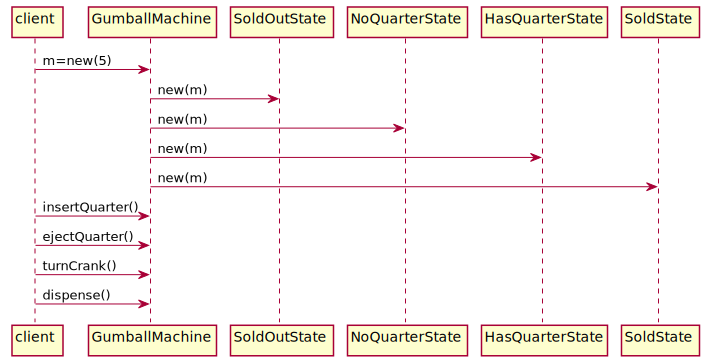

In [34]:
%%plantuml
@startuml
client -> GumballMachine:m=new(5)
GumballMachine -> SoldOutState:new(m)
GumballMachine -> NoQuarterState:new(m)
GumballMachine -> HasQuarterState:new(m)
GumballMachine -> SoldState:new(m)
client -> GumballMachine:insertQuarter()

client -> GumballMachine:ejectQuarter()
client -> GumballMachine:turnCrank()
client -> GumballMachine:dispense()
@enduml

In [ ]:
# %load ./src/headfirst/state/gumballstate/State.java
package headfirst.state.gumballstate;

public interface State {
	public void insertQuarter();
	public void ejectQuarter();
	public void turnCrank();
	public void dispense();
}


In [ ]:
# %load ./src/headfirst/state/gumballstate/HasQuarterState.java
package headfirst.state.gumballstate;

import java.util.Random;

public class HasQuarterState implements State {
    GumballMachine gumballMachine;
 
    public HasQuarterState(GumballMachine gumballMachine) {
        this.gumballMachine = gumballMachine;
    }
  
    public void insertQuarter() {
        System.out.println("You can't insert another quarter");
    }
 
    public void ejectQuarter() {
        System.out.println("Quarter returned");
        gumballMachine.setState(gumballMachine.getNoQuarterState());
    }
 
    public void turnCrank() {
        System.out.println("You turned...");
        gumballMachine.setState(gumballMachine.getSoldState());
    }

    public void dispense() {
        System.out.println("No gumball dispensed");
    }
 
    public String toString() {
        return "waiting for turn of crank";
    }
}


In [ ]:
# %load ./src/headfirst/state/gumballstate/NoQuarterState.java
package headfirst.state.gumballstate;

public class NoQuarterState implements State {
    GumballMachine gumballMachine;
 
    public NoQuarterState(GumballMachine gumballMachine) {
        this.gumballMachine = gumballMachine;
    }
 
	public void insertQuarter() {
		System.out.println("You inserted a quarter");
		gumballMachine.setState(gumballMachine.getHasQuarterState());
	}
 
	public void ejectQuarter() {
		System.out.println("You haven't inserted a quarter");
	}
 
	public void turnCrank() {
		System.out.println("You turned, but there's no quarter");
	 }
 
	public void dispense() {
		System.out.println("You need to pay first");
	} 
 
	public String toString() {
		return "waiting for quarter";
	}
}


In [ ]:
# %load ./src/headfirst/state/gumballstate/SoldOutState.java
package headfirst.state.gumballstate;

public class SoldOutState implements State {
    GumballMachine gumballMachine;
 
    public SoldOutState(GumballMachine gumballMachine) {
        this.gumballMachine = gumballMachine;
    }
 
	public void insertQuarter() {
		System.out.println("You can't insert a quarter, the machine is sold out");
	}
 
	public void ejectQuarter() {
		System.out.println("You can't eject, you haven't inserted a quarter yet");
	}
 
	public void turnCrank() {
		System.out.println("You turned, but there are no gumballs");
	}
 
	public void dispense() {
		System.out.println("No gumball dispensed");
	}
 
	public String toString() {
		return "sold out";
	}
}


In [ ]:
# %load ./src/headfirst/state/gumballstate/SoldState.java
package headfirst.state.gumballstate;

public class SoldState implements State {
 
    GumballMachine gumballMachine;
 
    public SoldState(GumballMachine gumballMachine) {
        this.gumballMachine = gumballMachine;
    }
       
	public void insertQuarter() {
		System.out.println("Please wait, we're already giving you a gumball");
	}
 
	public void ejectQuarter() {
		System.out.println("Sorry, you already turned the crank");
	}
 
	public void turnCrank() {
		System.out.println("Turning twice doesn't get you another gumball!");
	}
 
	public void dispense() {
		gumballMachine.releaseBall();
		if (gumballMachine.getCount() > 0) {
			gumballMachine.setState(gumballMachine.getNoQuarterState());
		} else {
			System.out.println("Oops, out of gumballs!");
			gumballMachine.setState(gumballMachine.getSoldOutState());
		}
	}
 
	public String toString() {
		return "dispensing a gumball";
	}
}


In [ ]:
# %load ./src/headfirst/state/gumballstate/GumballMachine.java
package headfirst.state.gumballstate;

public class GumballMachine {
    State soldOutState;
    State noQuarterState;
    State hasQuarterState;
    State soldState;
 
    State state = soldOutState;
    int count = 0;
 
    public GumballMachine(int numberGumballs) {
        soldOutState = new SoldOutState(this);
        noQuarterState = new NoQuarterState(this);
        hasQuarterState = new HasQuarterState(this);
        soldState = new SoldState(this);

        this.count = numberGumballs;
        if (numberGumballs > 0) {
            state = noQuarterState;
        } 
    }
 
    public void insertQuarter() {
        state.insertQuarter();
    }

    public void ejectQuarter() {
        state.ejectQuarter();
    }
 
    public void turnCrank() {
        state.turnCrank();
        state.dispense();
    }

    void setState(State state) {
        this.state = state;
    }

    void releaseBall() {
        System.out.println("A gumball comes rolling out the slot...");
        if (count != 0) {
            count = count - 1;
        }
    }
 
    int getCount() {
        return count;
    }
 
    void refill(int count) {
        this.count = count;
        state = noQuarterState;
    }

    public State getState() {
        return state;
    }

    public State getSoldOutState() {
        return soldOutState;
    }

    public State getNoQuarterState() {
        return noQuarterState;
    }

    public State getHasQuarterState() {
        return hasQuarterState;
    }

    public State getSoldState() {
        return soldState;
    }
 
    public String toString() {
        StringBuffer result = new StringBuffer();
        result.append("\nMighty Gumball, Inc.");
        result.append("\nJava-enabled Standing Gumball Model #2004");
        result.append("\nInventory: " + count + " gumball");
        if (count != 1) {
            result.append("s");
        }
        result.append("\n");
        result.append("Machine is " + state + "\n");
        return result.toString();
    }
}


In [ ]:
# %load ./src/headfirst/state/gumballstate/GumballMachineTestDrive.java
package headfirst.state.gumballstate;

public class GumballMachineTestDrive {
    public static void main(String[] args) {
        GumballMachine gumballMachine = new GumballMachine(5);

        System.out.println(gumballMachine);

        gumballMachine.insertQuarter();
        gumballMachine.turnCrank();

        System.out.println(gumballMachine);

        gumballMachine.insertQuarter();
        gumballMachine.turnCrank();
        gumballMachine.insertQuarter();
        gumballMachine.turnCrank();

        System.out.println(gumballMachine);
    }
}


In [18]:
!javac -d classes/ -sourcepath src/ src/headfirst/state/gumballstate/*.java
!java -cp classes/ headfirst.state.gumballstate.GumballMachineTestDrive


Mighty Gumball, Inc.
Java-enabled Standing Gumball Model #2004
Inventory: 5 gumballs
Machine is waiting for quarter

You inserted a quarter
You turned...
A gumball comes rolling out the slot...

Mighty Gumball, Inc.
Java-enabled Standing Gumball Model #2004
Inventory: 4 gumballs
Machine is waiting for quarter

You inserted a quarter
You turned...
A gumball comes rolling out the slot...
You inserted a quarter
You turned...
A gumball comes rolling out the slot...

Mighty Gumball, Inc.
Java-enabled Standing Gumball Model #2004
Inventory: 2 gumballs
Machine is waiting for quarter



### S.4.2 winner

* gumballstatewinner패키지
* winner일 경우, 사탕을 2개 얻음.

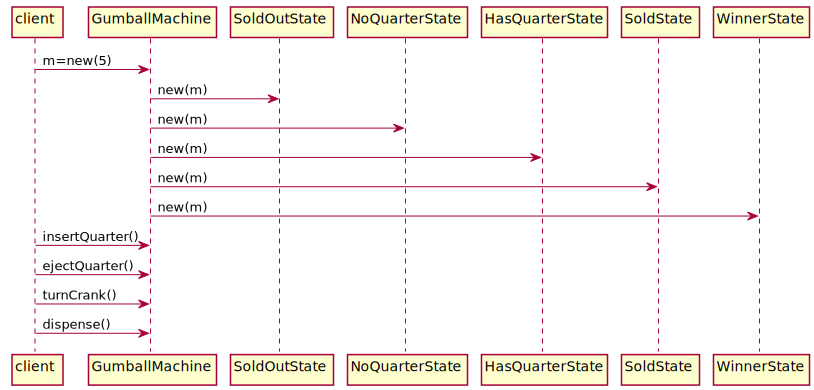

In [36]:
%%plantuml
@startuml
client -> GumballMachine:m=new(5)
GumballMachine -> SoldOutState:new(m)
GumballMachine -> NoQuarterState:new(m)
GumballMachine -> HasQuarterState:new(m)
GumballMachine -> SoldState:new(m)
GumballMachine -> WinnerState:new(m)
client -> GumballMachine:insertQuarter()
client -> GumballMachine:ejectQuarter()
client -> GumballMachine:turnCrank()
client -> GumballMachine:dispense()
@enduml

In [ ]:
# %load ./src/headfirst/state/gumballstatewinner/State.java
package headfirst.state.gumballstatewinner;

public interface State {
	public void insertQuarter();
	public void ejectQuarter();
	public void turnCrank();
	public void dispense();
}


In [ ]:
# %load ./src/headfirst/state/gumballstatewinner/HasQuarterState.java
package headfirst.state.gumballstatewinner;

import java.util.Random;

public class HasQuarterState implements State {
	Random randomWinner = new Random(System.currentTimeMillis());
	GumballMachine gumballMachine;
 
	public HasQuarterState(GumballMachine gumballMachine) {
		this.gumballMachine = gumballMachine;
	}
  
	public void insertQuarter() {
		System.out.println("You can't insert another quarter");
	}
 
	public void ejectQuarter() {
		System.out.println("Quarter returned");
		gumballMachine.setState(gumballMachine.getNoQuarterState());
	}
 
	public void turnCrank() {
		System.out.println("You turned...");
		int winner = randomWinner.nextInt(10);
		if ((winner == 0) && (gumballMachine.getCount() > 1)) {
			gumballMachine.setState(gumballMachine.getWinnerState());
		} else {
			gumballMachine.setState(gumballMachine.getSoldState());
		}
	}

    public void dispense() {
        System.out.println("No gumball dispensed");
    }
 
	public String toString() {
		return "waiting for turn of crank";
	}
}


In [ ]:
# %load ./src/headfirst/state/gumballstatewinner/NoQuarterState.java
package headfirst.state.gumballstatewinner;

public class NoQuarterState implements State {
    GumballMachine gumballMachine;
 
    public NoQuarterState(GumballMachine gumballMachine) {
        this.gumballMachine = gumballMachine;
    }
 
	public void insertQuarter() {
		System.out.println("You inserted a quarter");
		gumballMachine.setState(gumballMachine.getHasQuarterState());
	}
 
	public void ejectQuarter() {
		System.out.println("You haven't inserted a quarter");
	}
 
	public void turnCrank() {
		System.out.println("You turned, but there's no quarter");
	 }
 
	public void dispense() {
		System.out.println("You need to pay first");
	} 
 
	public String toString() {
		return "waiting for quarter";
	}
}


In [ ]:
# %load ./src/headfirst/state/gumballstatewinner/SoldOutState.java
package headfirst.state.gumballstatewinner;

public class SoldOutState implements State {
    GumballMachine gumballMachine;
 
    public SoldOutState(GumballMachine gumballMachine) {
        this.gumballMachine = gumballMachine;
    }
 
	public void insertQuarter() {
		System.out.println("You can't insert a quarter, the machine is sold out");
	}
 
	public void ejectQuarter() {
		System.out.println("You can't eject, you haven't inserted a quarter yet");
	}
 
	public void turnCrank() {
		System.out.println("You turned, but there are no gumballs");
	}
 
	public void dispense() {
		System.out.println("No gumball dispensed");
	}
 
	public String toString() {
		return "sold out";
	}
}


In [ ]:
# %load ./src/headfirst/state/gumballstatewinner/SoldState.java
package headfirst.state.gumballstatewinner;

public class SoldState implements State {
    GumballMachine gumballMachine;
 
    public SoldState(GumballMachine gumballMachine) {
        this.gumballMachine = gumballMachine;
    }
       
	public void insertQuarter() {
		System.out.println("Please wait, we're already giving you a gumball");
	}
 
	public void ejectQuarter() {
		System.out.println("Sorry, you already turned the crank");
	}
 
	public void turnCrank() {
		System.out.println("Turning twice doesn't get you another gumball!");
	}
 
	public void dispense() {
		gumballMachine.releaseBall();
		if (gumballMachine.getCount() > 0) {
			gumballMachine.setState(gumballMachine.getNoQuarterState());
		} else {
			System.out.println("Oops, out of gumballs!");
			gumballMachine.setState(gumballMachine.getSoldOutState());
		}
	}
 
	public String toString() {
		return "dispensing a gumball";
	}
}


In [ ]:
# %load ./src/headfirst/state/gumballstatewinner/WinnerState.java
package headfirst.state.gumballstatewinner;

public class WinnerState implements State {
    GumballMachine gumballMachine;
 
    public WinnerState(GumballMachine gumballMachine) {
        this.gumballMachine = gumballMachine;
    }
 
	public void insertQuarter() {
		System.out.println("Please wait, we're already giving you a Gumball");
	}
 
	public void ejectQuarter() {
		System.out.println("Please wait, we're already giving you a Gumball");
	}
 
	public void turnCrank() {
		System.out.println("Turning again doesn't get you another gumball!");
	}
 
	public void dispense() {
		System.out.println("YOU'RE A WINNER! You get two gumballs for your quarter");
		gumballMachine.releaseBall();
		if (gumballMachine.getCount() == 0) {
			gumballMachine.setState(gumballMachine.getSoldOutState());
		} else {
			gumballMachine.releaseBall();
			if (gumballMachine.getCount() > 0) {
				gumballMachine.setState(gumballMachine.getNoQuarterState());
			} else {
            	System.out.println("Oops, out of gumballs!");
				gumballMachine.setState(gumballMachine.getSoldOutState());
			}
		}
	}
 
	public String toString() {
		return "despensing two gumballs for your quarter, because YOU'RE A WINNER!";
	}
}


In [ ]:
# %load ./src/headfirst/state/gumballstatewinner/GumballMachine.java
package headfirst.state.gumballstatewinner;

public class GumballMachine {
 
	State soldOutState;
	State noQuarterState;
	State hasQuarterState;
	State soldState;
	State winnerState;
 
	State state = soldOutState;
	int count = 0;
 
	public GumballMachine(int numberGumballs) {
		soldOutState = new SoldOutState(this);
		noQuarterState = new NoQuarterState(this);
		hasQuarterState = new HasQuarterState(this);
		soldState = new SoldState(this);
		winnerState = new WinnerState(this);

		this.count = numberGumballs;
 		if (numberGumballs > 0) {
			state = noQuarterState;
		} 
	}
 
	public void insertQuarter() {
		state.insertQuarter();
	}
 
	public void ejectQuarter() {
		state.ejectQuarter();
	}
 
	public void turnCrank() {
		state.turnCrank();
		state.dispense();
	}

	void setState(State state) {
		this.state = state;
	}
 
	void releaseBall() {
		System.out.println("A gumball comes rolling out the slot...");
		if (count != 0) {
			count = count - 1;
		}
	}
 
	int getCount() {
		return count;
	}
 
	void refill(int count) {
		this.count = count;
		state = noQuarterState;
	}

    public State getState() {
        return state;
    }

    public State getSoldOutState() {
        return soldOutState;
    }

    public State getNoQuarterState() {
        return noQuarterState;
    }

    public State getHasQuarterState() {
        return hasQuarterState;
    }

    public State getSoldState() {
        return soldState;
    }

    public State getWinnerState() {
        return winnerState;
    }
 
	public String toString() {
		StringBuffer result = new StringBuffer();
		result.append("\nMighty Gumball, Inc.");
		result.append("\nJava-enabled Standing Gumball Model #2004");
		result.append("\nInventory: " + count + " gumball");
		if (count != 1) {
			result.append("s");
		}
		result.append("\n");
		result.append("Machine is " + state + "\n");
		return result.toString();
	}
}


In [ ]:
# %load ./src/headfirst/state/gumballstatewinner/GumballMachineTestDrive.java
package headfirst.state.gumballstatewinner;

public class GumballMachineTestDrive {

	public static void main(String[] args) {
		GumballMachine gumballMachine = 
			new GumballMachine(10);

		System.out.println(gumballMachine);

		gumballMachine.insertQuarter();
		gumballMachine.turnCrank();
		gumballMachine.insertQuarter();
		gumballMachine.turnCrank();

		System.out.println(gumballMachine);

		gumballMachine.insertQuarter();
		gumballMachine.turnCrank();
		gumballMachine.insertQuarter();
		gumballMachine.turnCrank();

		System.out.println(gumballMachine);

		gumballMachine.insertQuarter();
		gumballMachine.turnCrank();
		gumballMachine.insertQuarter();
		gumballMachine.turnCrank();

		System.out.println(gumballMachine);

		gumballMachine.insertQuarter();
		gumballMachine.turnCrank();
		gumballMachine.insertQuarter();
		gumballMachine.turnCrank();

		System.out.println(gumballMachine);

		gumballMachine.insertQuarter();
		gumballMachine.turnCrank();
		gumballMachine.insertQuarter();
		gumballMachine.turnCrank();

		System.out.println(gumballMachine);
	}
}
